In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data.sampler import SubsetRandomSampler

#### Path where entire data is located

In [8]:
data_path = 'new_contours'

#### A method to split train and test datasets and generate loaders

In [29]:
def train_test_split(data_dir, validation_size=0.2):
    transform = transforms.Compose(
        [transforms.Resize(128),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )
    
    data = datasets.ImageFolder(root=data_dir, transform=transform)
    num_train = len(data)
    indices = list(range(num_train))
    test_size = int(np.floor(validation_size * num_train))
    np.random.shuffle(indices)
    
    train_indices, test_indices = indices[test_size:], indices[:test_size]
    train_sampler = SubsetRandomSampler(train_indices)
    test_sampler = SubsetRandomSampler(test_indices)
    
    train_loader = torch.utils.data.DataLoader(data, sampler=train_sampler, batch_size=32)
    test_loader = torch.utils.data.DataLoader(data, sampler=test_sampler, batch_size=32)
    return train_loader, test_loader

In [30]:
train_loader, test_loader = train_test_split(data_path, validation_size=0.2)

#### Classes for the dataset

In [31]:
classes = train_loader.dataset.classes
classes

['fist', 'left', 'ok', 'right', 'straight']

### Display sample images from the dataset

In [32]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [33]:
# Get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

In [34]:
labels

tensor([0, 4, 1, 0, 3, 0, 3, 0, 4, 2, 1, 2, 0, 2, 4, 2, 3, 4, 2, 1, 1, 4, 1, 4,
        4, 3, 1, 1, 4, 3, 0, 0])

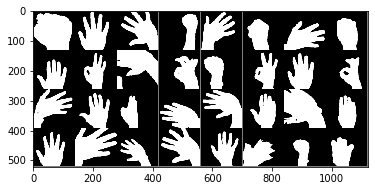

fist, straight, left, fist, right, fist, right, fist, straight, ok, left, ok, fist, ok, straight, ok, right, straight, ok, left, left, straight, left, straight, straight, right, left, left, straight, right, fist, fist


In [35]:
# Displays one random batch of images
imshow(torchvision.utils.make_grid(images))
print(', '.join([classes[labels[j]] for j in range(32)]))

In [36]:
images[0].shape

torch.Size([3, 128, 138])

### Define a Convolutional Network

In [37]:
import torch.nn as nn
import torch.nn.functional as F

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*29*31, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*29*31)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [53]:
net = Net()

### Define a loss function and optimizer

In [54]:
import torch.optim as optim

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [56]:
epochs = 3
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero out the parameter gradients
        optimizer.zero_grad()
        
        # Forward + Backward + Optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Stats
        running_loss += loss.item()
        if i % 10 == 9:
            # Print every 10 mini-batches
            print('[Epoch: {0}, Batch: {1}] Loss: {2}'.format(epoch+1, i+1, running_loss/10))
            running_loss = 0.0

print('Finished Training...!!')

[Epoch: 1, Batch: 10] Loss: 2.290254807472229
[Epoch: 1, Batch: 20] Loss: 2.2232009410858153
[Epoch: 1, Batch: 30] Loss: 2.0926756501197814
[Epoch: 1, Batch: 40] Loss: 1.835752785205841
[Epoch: 1, Batch: 50] Loss: 1.520159697532654
[Epoch: 1, Batch: 60] Loss: 1.3935134053230285
[Epoch: 1, Batch: 70] Loss: 1.327189302444458
[Epoch: 1, Batch: 80] Loss: 1.2597884774208068
[Epoch: 1, Batch: 90] Loss: 1.090183287858963
[Epoch: 1, Batch: 100] Loss: 1.0187632739543915
[Epoch: 1, Batch: 110] Loss: 0.9280206322669983
[Epoch: 1, Batch: 120] Loss: 0.9485352218151093
[Epoch: 1, Batch: 130] Loss: 1.010601419210434
[Epoch: 1, Batch: 140] Loss: 0.878444391489029
[Epoch: 1, Batch: 150] Loss: 0.7985856354236602
[Epoch: 1, Batch: 160] Loss: 0.8841976642608642
[Epoch: 1, Batch: 170] Loss: 0.7617393136024475
[Epoch: 1, Batch: 180] Loss: 0.9571516394615174
[Epoch: 1, Batch: 190] Loss: 0.9211399257183075
[Epoch: 1, Batch: 200] Loss: 0.7587655156850814
[Epoch: 1, Batch: 210] Loss: 0.8825276732444763
[Epoch: 

#### Save the trained model

In [57]:
torch.save(net.state_dict(), 'new_contour_model.pth')

## Testing the trained model

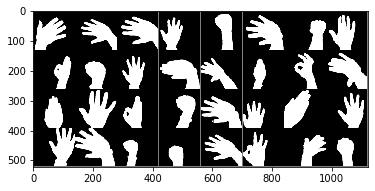

GroundTruth:  right, left, left, straight, fist, left, fist, straight, ok, fist, straight, left, left, straight, ok, left, straight, straight, ok, fist, left, straight, right, straight, straight, left, fist, fist, left, ok, right, fist


In [58]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ', '.join([classes[labels[j]] for j in range(32)]))

### Load the model

In [60]:
net = Net()
net.load_state_dict(torch.load('new_contour_model.pth'))

<All keys matched successfully>

In [61]:
images.shape

torch.Size([32, 3, 128, 138])

In [62]:
outputs = net(images)

In [63]:
_, predicted = torch.max(outputs, 1)

In [64]:
predicted

tensor([3, 1, 1, 4, 0, 1, 0, 4, 0, 0, 4, 1, 1, 4, 2, 1, 4, 4, 2, 0, 1, 4, 2, 4,
        4, 1, 0, 0, 1, 2, 3, 0])

In [65]:
print('Predicted: ', ', '.join([classes[predicted[j]] for j in range(32)]))

Predicted:  right, left, left, straight, fist, left, fist, straight, fist, fist, straight, left, left, straight, ok, left, straight, straight, ok, fist, left, straight, ok, straight, straight, left, fist, fist, left, ok, right, fist


### Check how the model performs on the whole dataset

In [66]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy = {}'.format(100 * correct / total))

Accuracy = 89.43543879262158


### Test how the model performed for different classes

In [67]:
class_correct = list(0 for i in range(5))
class_total = list(0 for i in range(5))

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        batch_size = min(32, len(images))
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
            
for i in range(5):
    print('Accuracy of {}: {}'.format(classes[i], 100*class_correct[i]/class_total[i]))
    

Accuracy of fist: 86.64772727272727
Accuracy of left: 99.7289972899729
Accuracy of ok: 80.34188034188034
Accuracy of right: 93.73219373219374
Accuracy of straight: 86.33879781420765


### Training on GPU

In [68]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)